# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot


2022-06-28 10:07:17.842489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 10:07:17.842520: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Exploratory Data Analysis 

### File and parameters loading

In [94]:
problem_type = 'regression'

In [95]:
stacking = 'True'

In [96]:
data_size = 'small'

In [97]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking-main/dataset/concrete_data.csv')

In [98]:
target_col = 'Strength'

#### Thresholds

In [99]:
threshold_NaN = 0.5

In [100]:
threshold_cat = 5

In [101]:
threshold_Z = 3.0

In [102]:
test_size = 0.33

In [103]:
threshold_entropy = 0.75

In [104]:
threshold_corr = 0.95

In [105]:
threshold_model = 5

In [106]:
threshold_score = 0.7

In [107]:
threshold_feature = 5

#### Drop user's columns:
_Note: after 1st round, feature importances indicate that the following columns can be suppressed._

In [108]:
user_drop_cols = ['Coarse_Aggregate', 'Fine_Aggregate', 'Fly_Ash']

Dataset before deletion

In [109]:
display(df)

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse_Aggregate  Fine_Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28     61.89  
2                932.0           594.0  270     40.27  
3                932.0           594.0  365     41.05  
4                978.4           825.5  360     44.30  
...                ...             ...  ...       ...  
1025             870.1           768.3   28     44.28  
1026             817.9           813.4   28     31.18  
1027             892.4           780.0   28     23.70  
1028             989.6           788.9   28     32.77  
1029             864.5           761.5   28     32.40  

[1030 rows x 9 columns]

In [110]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [111]:
display(df)

Cement  Blast_Furnace_Slag  Water  Superplasticizer  Age  Strength
0      540.0                 0.0  162.0               2.5   28     79.99
1      540.0                 0.0  162.0               2.5   28     61.89
2      332.5               142.5  228.0               0.0  270     40.27
3      332.5               142.5  228.0               0.0  365     41.05
4      198.6               132.4  192.0               0.0  360     44.30
...      ...                 ...    ...               ...  ...       ...
1025   276.4               116.0  179.6               8.9   28     44.28
1026   322.2                 0.0  196.0              10.4   28     31.18
1027   148.5               139.4  192.7               6.1   28     23.70
1028   159.1               186.7  175.6              11.3   28     32.77
1029   260.9               100.5  200.6               8.6   28     32.40

[1030 rows x 6 columns]

#### Dataset copy

In [112]:
df_copy = df.copy()

### Dataset Information

In [113]:
df.shape

(1030, 6)

#### Some records

In [114]:
display(df)

Cement  Blast_Furnace_Slag  Water  Superplasticizer  Age  Strength
0      540.0                 0.0  162.0               2.5   28     79.99
1      540.0                 0.0  162.0               2.5   28     61.89
2      332.5               142.5  228.0               0.0  270     40.27
3      332.5               142.5  228.0               0.0  365     41.05
4      198.6               132.4  192.0               0.0  360     44.30
...      ...                 ...    ...               ...  ...       ...
1025   276.4               116.0  179.6               8.9   28     44.28
1026   322.2                 0.0  196.0              10.4   28     31.18
1027   148.5               139.4  192.7               6.1   28     23.70
1028   159.1               186.7  175.6              11.3   28     32.77
1029   260.9               100.5  200.6               8.6   28     32.40

[1030 rows x 6 columns]

#### Dataframe structure

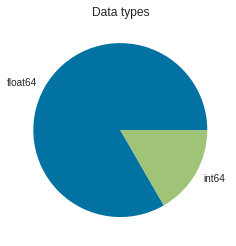

In [115]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [116]:
display(df.describe().T)

count        mean         std     min      25%      50%  \
Cement              1030.0  281.167864  104.506364  102.00  192.375  272.900   
Blast_Furnace_Slag  1030.0   73.895825   86.279342    0.00    0.000   22.000   
Water               1030.0  181.567282   21.354219  121.80  164.900  185.000   
Superplasticizer    1030.0    6.204660    5.973841    0.00    0.000    6.400   
Age                 1030.0   45.662136   63.169912    1.00    7.000   28.000   
Strength            1030.0   35.817961   16.705742    2.33   23.710   34.445   

                        75%    max  
Cement              350.000  540.0  
Blast_Furnace_Slag  142.950  359.4  
Water               192.000  247.0  
Superplasticizer     10.200   32.2  
Age                  56.000  365.0  
Strength             46.135   82.6

#### Which columns could be categorical ?

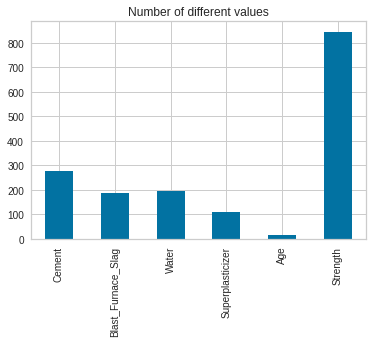

In [117]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [118]:
duplicates(df)

Number of rows before removing: 1030
Number of duplicate rows: 26
Number of rows after removing: 1004


Cement  Blast_Furnace_Slag  Water  Superplasticizer  Age  Strength
0      540.0                 0.0  162.0               2.5   28     79.99
1      540.0                 0.0  162.0               2.5   28     61.89
2      332.5               142.5  228.0               0.0  270     40.27
3      332.5               142.5  228.0               0.0  365     41.05
4      198.6               132.4  192.0               0.0  360     44.30
...      ...                 ...    ...               ...  ...       ...
1025   276.4               116.0  179.6               8.9   28     44.28
1026   322.2                 0.0  196.0              10.4   28     31.18
1027   148.5               139.4  192.7               6.1   28     23.70
1028   159.1               186.7  175.6              11.3   28     32.77
1029   260.9               100.5  200.6               8.6   28     32.40

[1004 rows x 6 columns]

#### Drop NaN:

In [119]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [120]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [121]:
display(dropped_cols)

array(['Coarse_Aggregate', 'Fine_Aggregate', 'Fly_Ash'], dtype='<U32')

#### Encoding data:

In [122]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Cement
Encoding numeric column: Blast_Furnace_Slag
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


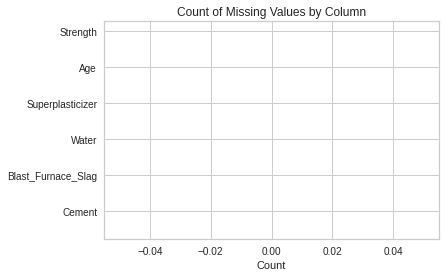

In [123]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [124]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [125]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.05MB
Memory usage after optimization is: 0.01MB
Decreased by 74.8%


##### Dataframe structure after compression

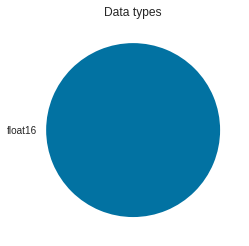

In [126]:
plot_dataframe_structure(df)

#### Outliers:

In [127]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


### Plottings

#### Ranking 

##### Ranking 1D 

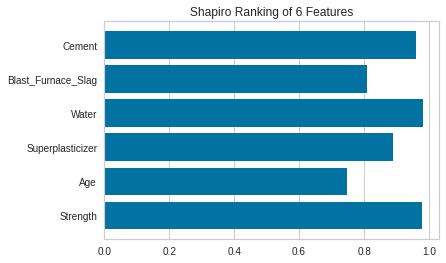

In [128]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

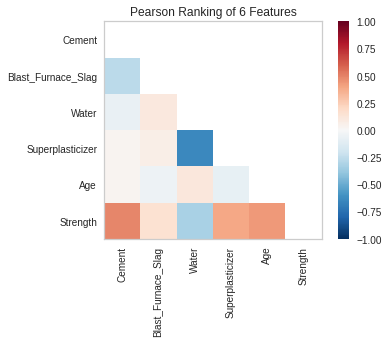

In [129]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

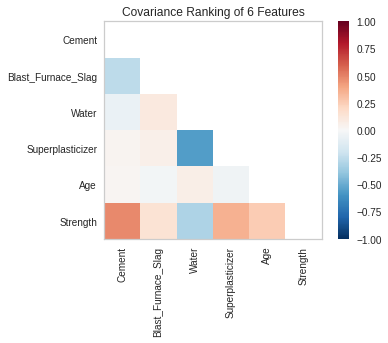

In [130]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

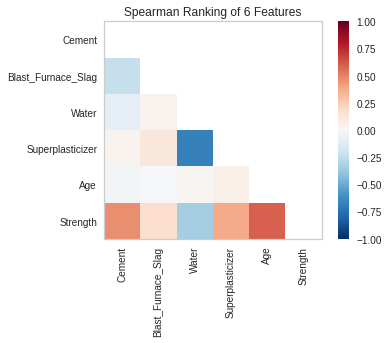

In [131]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

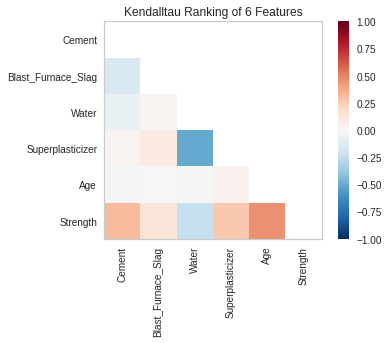

In [132]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [133]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [134]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [135]:
y = df[target_col]

In [136]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

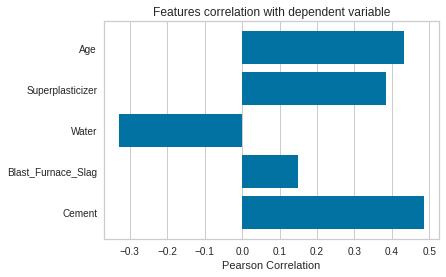

In [137]:
feature_correlation(X, y);

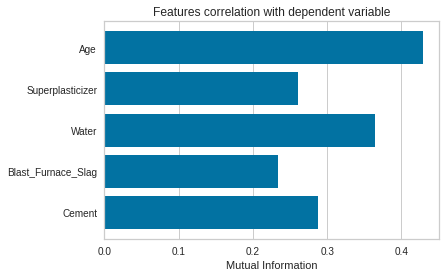

In [138]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

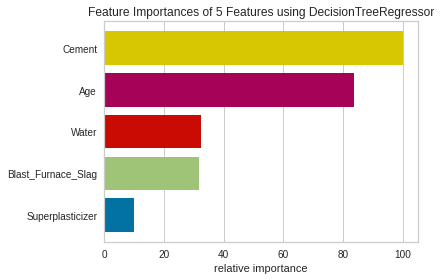

In [139]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

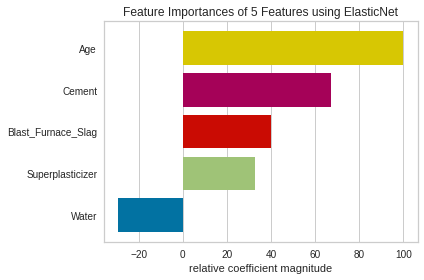

In [140]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

#### Check columns that should be dropped

In [141]:
print(dropped_cols)

[]


## Splittings 

In [142]:
df = df_copy

#### Splitting dataframe in features and targets

In [143]:
y = df[target_col]

In [144]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [145]:
nb_features = len(X.columns.tolist())

In [146]:
nb_targets = 1

In [147]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [148]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [149]:
cat_selector = make_column_selector(dtype_include=object)

In [150]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [151]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [152]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [153]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [154]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [155]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [156]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Keras neural network definition

In [157]:
def K_Regre(): 
    keras.backend.clear_session()
#   neural network architecture: start  
    model = Sequential() 
    model.add(Dense(10 * layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(1)) 
#   neural network architecture: end   
    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model


##### Early Stopping

In [158]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [159]:
K_R = KerasRegressor(K_Regre, batch_size=64, epochs=2000, callbacks=[es], validation_split=0.1, verbose=1) 
K_R._estimator_type = 'regressor'

##### Level-0 models

In [160]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTRF', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse'))), 
          ('DTRA', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='absolute_error'))), 
          ('DTRP', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='poisson'))), 
          ('RFRS', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=50))), 
          ('RFRA', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=50))), 
          ('RFRP', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='poisson', n_estimators=50))), 
          ('ABR', make_pipeline(ntree_preprocessor, AdaBoostRegressor())), 
          ('HGBR', make_pipeline(ntree_preprocessor, HistGradientBoostingRegressor(early_stopping=True))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR10', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPR20', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('KERR', make_pipeline(ntree_preprocessor, K_R)), 
          ]

##### Level-1 model

In [161]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Stacking for regression

In [162]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [163]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
10/10 [==============================] - 2s 24ms/step - loss: 1501.2615 - val_loss: 1626.9043
Epoch 2/2000
10/10 [==============================] - 0s 7ms/step - loss: 1498.4749 - val_loss: 1610.9767
Epoch 3/2000
10/10 [==============================] - 0s 7ms/step - loss: 1483.7964 - val_loss: 1597.2698
Epoch 4/2000
10/10 [==============================] - 0s 6ms/step - loss: 1470.7886 - val_loss: 1584.2839
Epoch 5/2000
10/10 [==============================] - 0s 7ms/step - loss: 1447.8865 - val_loss: 1571.5792
Epoch 6/2000
10/10 [==============================] - 0s 6ms/step - loss: 1454.1798 - val_loss: 1560.6251
Epoch 7/2000
10/10 [==============================] - 0s 7ms/step - loss: 1438.3834 - val_loss: 1548.8199
Epoch 8/2000
10/10 [==============================] - 0s 6ms/step - loss: 1427.8660 - val_loss: 1537.4441
Epoch 9/2000
10/10 [==============================] - 0s 7ms/step - loss: 1422.2651 - val_loss: 1526.0913
Epoch 10/2000
10/10 [========================

StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb544aba8c0>),
                                                                                                 ('pipeline-2'...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb544ab85e0>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('kerasregressor',
                                                <keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb545329f90>)]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1))

### Model evaluation

#### Model scoring

6/6 [==============================] - 0s 3ms/step


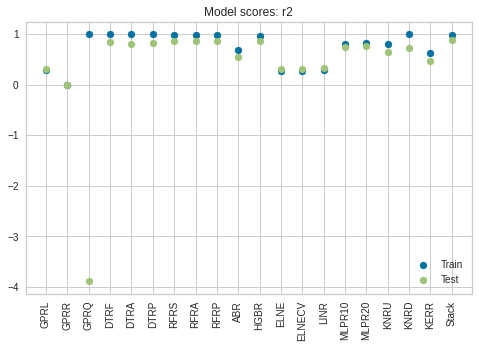

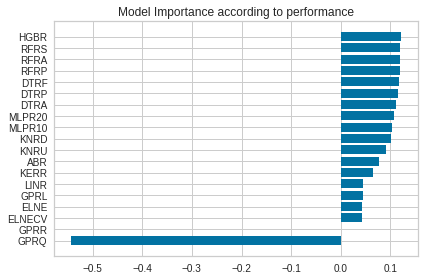

In [164]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

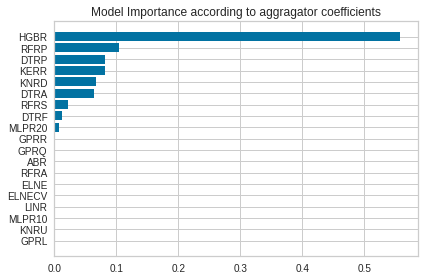

In [165]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

6/6 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://98ac1e7d-a0a7-47ae-819f-8e6c5c5c68fa/assets
INFO:tensorflow:Assets written to: ram://0b164767-8265-4404-9033-e4ba77cf9339/assets


2022-06-28 10:25:30.284102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 10:25:30.284141: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Assets written to: ram://194e5e96-e4bc-4404-b3d7-113792c25c80/assets


2022-06-28 10:25:32.884233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 10:25:32.884299: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Assets written to: ram://5890ba92-9c94-4794-93d4-74d9f4ea1ac8/assets


2022-06-28 10:25:33.383516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 10:25:33.383580: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 10:25:33.383614: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 10:25:33.383999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-28 10:25:35.000319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

6/6 [==============================] - 0s 4ms/step


2022-06-28 10:25:36.434226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 10:25:36.434306: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 10:25:36.434340: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 10:25:36.434701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets written to: ram://f928c5ec-c193-4d5e-91fb-9371b02e9aaa/assets
6/6 [==============================] - 0s 3ms/step


2022-06-28 10:25:38.415301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 10:25:38.415671: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


6/6 [==============================] - 0s 2ms/step


2022-06-28 10:25:38.696234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 10:25:38.696288: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 10:25:38.696321: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 10:25:38.696747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 3ms/step


2022-06-28 10:25:41.787235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 10:25:41.787280: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 10:25:41.787314: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 10:25:41.787697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 1ms/step


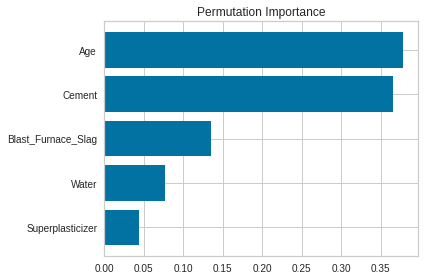

array([['Superplasticizer', 0.0445151217110962],
       ['Water', 0.07693655022722223],
       ['Blast_Furnace_Slag', 0.13503867247192147],
       ['Cement', 0.36567592281402467],
       ['Age', 0.3778337327757354]], dtype=object)

In [166]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [167]:
features_of_interest = []

INFO:tensorflow:Assets written to: ram://f32101f5-5793-4b29-a165-e2984b8c36f0/assets
11/11 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://b9c757a5-7b2d-415d-b11e-399bf177042c/assets
11/11 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://56b34196-43b4-4df3-b9c8-34a827c83e57/assets
11/11 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://ee5f7589-6c1f-46b1-b3ca-31a58a655c99/assets
11/11 [==============================] - 0s 1ms/step


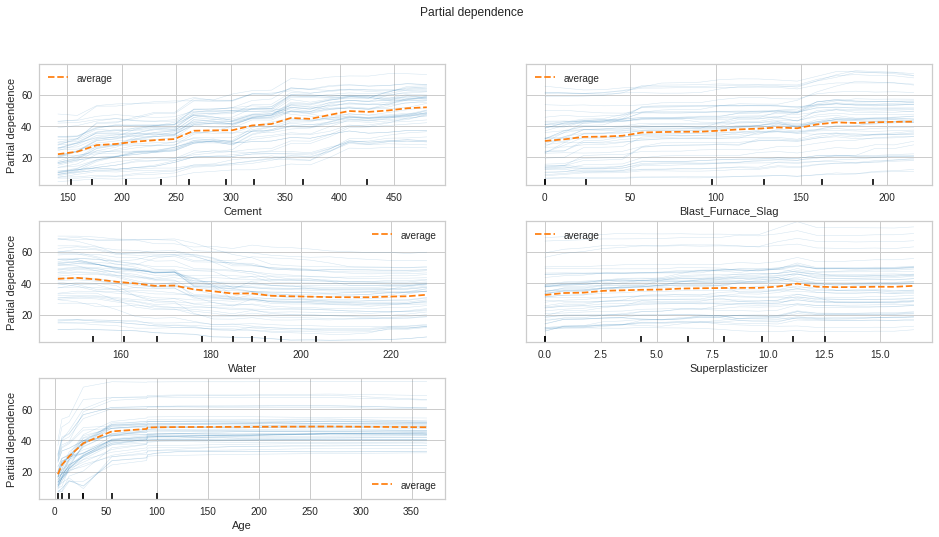

In [168]:
plot_partial_dependence(model, X_train, features_of_interest)

#### Residuals plot

6/6 [==============================] - 0s 3ms/step


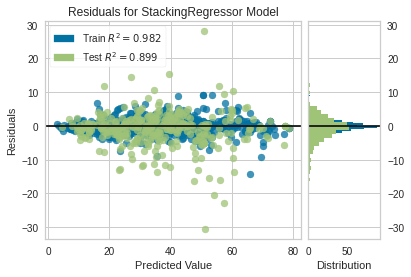

In [169]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

6/6 [==============================] - 0s 2ms/step


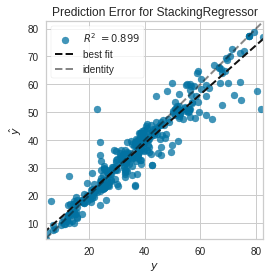

In [170]:
prediction_error(model, X_train, y_train, X_test, y_test);

### Final Model

In [171]:
threshold_model = 5

In [172]:
threshold_score = 0.7

##### Filtered Level-0 models

In [173]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [174]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Build final model

In [175]:
model = StackingRegressor(level_0_f, final_estimator=level_1)

### Final Model fitting

In [176]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 7.69 s, sys: 77.1 ms, total: 7.77 s
Wall time: 3.11 s


StackingRegressor(estimators=[('DTRA',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb544aba8c0>),
                                                                                                 ('pipeline-2'...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb544ab85e0>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor(weights='distance'))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1))

#### Final Model scoring

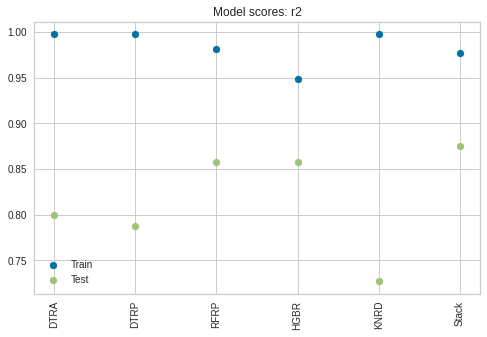

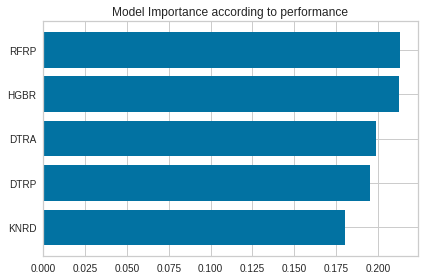

(array([['DTRA', 0.9974113617530295, 0.8001810847901499],
        ['DTRP', 0.9975004907835338, 0.7872690958723402],
        ['RFRP', 0.9817208093218968, 0.8582349426280491],
        ['HGBR', 0.9488882511642501, 0.8573669502945872],
        ['KNRD', 0.9975004907835338, 0.7270364554389803],
        ['Stack', 0.9767316935646245, 0.8756239859294938]], dtype=object),
 array([['KNRD', 0.18040210536393195],
        ['DTRP', 0.1953478416671355],
        ['DTRA', 0.1985517387589288],
        ['HGBR', 0.2127414681141509],
        ['RFRP', 0.21295684609585297]], dtype=object))

In [177]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

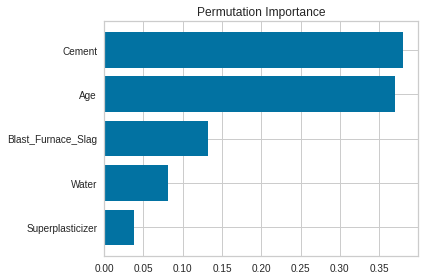

In [178]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [179]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [180]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [181]:
print(dropped_cols)

[]


#### Final Residuals plot

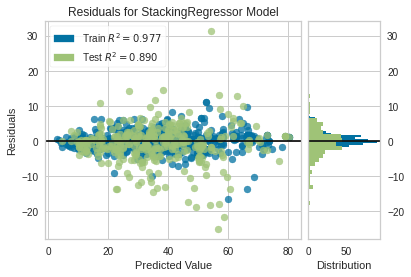

In [182]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Final Prediction error

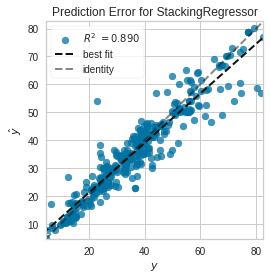

In [183]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Deployment

### Save your model

In [184]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [185]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)